# Pandas Datareader

There are a number of free data sources. Here we look at Pandas Datareader.

In [1]:
import os
import pandas as pd
from pprint import pprint

In [3]:
import pandas_datareader.data as web

`pandas` used to facilitate access to data providers' APIs directly, but this functionality has moved to the related pandas-datareader library. The stability of the APIs varies with provider policies, and as of June 2018 at version 0.7, the following sources are available

See [documentation](https://pandas-datareader.readthedocs.io/en/latest/); functionality frequently changes as underlying provider APIs evolve.

### Yahoo Finance

In [4]:
from datetime import datetime

start = '2014'
end = datetime(2021, 12, 15)

fb_data = web.DataReader('FB', 'yahoo', start=start, end=end)
fb_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2004 entries, 2014-01-02 to 2021-12-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2004 non-null   float64
 1   Low        2004 non-null   float64
 2   Open       2004 non-null   float64
 3   Close      2004 non-null   float64
 4   Volume     2004 non-null   int64  
 5   Adj Close  2004 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 109.6 KB


In [5]:
type(fb_data)

pandas.core.frame.DataFrame

In [6]:
fb_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,55.220001,54.189999,54.830002,54.709999,43195500,54.709999
2014-01-03,55.650002,54.529999,55.020000,54.560001,38246200,54.560001
2014-01-06,57.259998,54.049999,54.419998,57.200001,68852600,57.200001
2014-01-07,58.549999,57.220001,57.700001,57.919998,77207400,57.919998
2014-01-08,58.410000,57.230000,57.599998,58.230000,56682400,58.230000
...,...,...,...,...,...,...
2021-12-09,336.130005,328.000000,329.540009,329.820007,16879200,329.820007
2021-12-10,335.029999,326.369995,332.559998,329.750000,14520900,329.750000
2021-12-13,341.089996,329.589996,330.950012,334.489990,22948700,334.489990


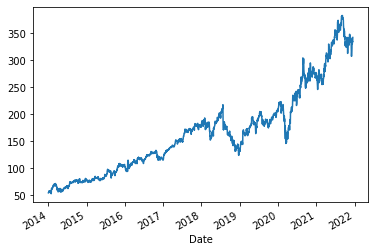

In [7]:
fb_data['Close'].plot();

In [8]:
symbols = ['AAPL', 'MSFT', 'BRK-A']

data = web.DataReader(symbols, 'yahoo', start='2014-03-01', end='2014-09-01')

In [9]:
data['Close']

Symbols,AAPL,MSFT,BRK-A
Date,,,
2014-03-03,18.848572,37.779999,174500.0
2014-03-04,18.972857,38.410000,177989.0
2014-03-05,19.012857,38.110001,178655.0
2014-03-06,18.955357,38.150002,182175.0
2014-03-07,18.944286,37.900002,183772.0
...,...,...,...
2014-08-25,25.385000,45.169998,204579.0
2014-08-26,25.222500,45.009998,204577.0
2014-08-27,25.532499,44.869999,204741.0


### Bond Yields

In [10]:
start = datetime(1965, 1, 1)
end = datetime(2021, 12, 15)
ylds = web.DataReader('IRLTLT01GBM156N', 'fred', start, end)

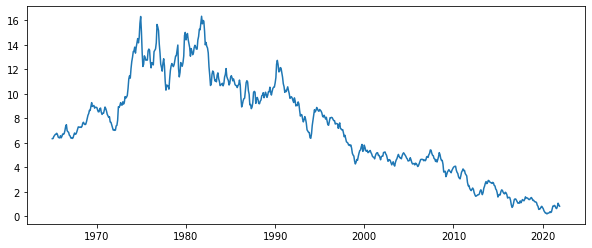

In [11]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,4))
plt.plot(ylds);

### Fama-French Factors

In [12]:
from pandas_datareader.famafrench import get_available_datasets
get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [13]:
ds = web.DataReader('5_Industry_Portfolios', 'famafrench')
print(ds['DESCR'])

5 Industry Portfolios
---------------------

This file was created by CMPT_IND_RETS using the 202112 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2021 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (59 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (59 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (5 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (5 rows x 5 cols)
  4 : Number of Firms in Portfolios (59 rows x 5 cols)
  5 : Average Firm Size (59 rows x 5 cols)
  6 : Sum of BE / Sum of ME (5 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (5 rows x 5 cols)


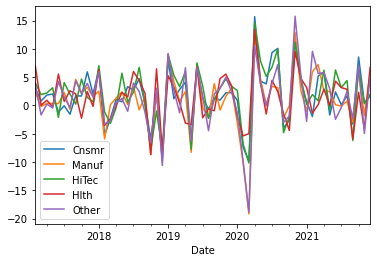

In [14]:
ds[0].plot();

<AxesSubplot:xlabel='Date'>

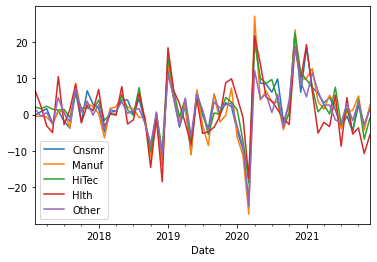

In [15]:
ds[1].plot()

# Economic Data

Pandas Datareader gives us access to the website of the St Louis FED and has Federal Reserve Data - both economic and market.

We start with GDP.

In [16]:
start = datetime(2010, 1, 1)
end = datetime(2021, 12, 15)
gdp = web.DataReader('GDP', 'fred', start, end)

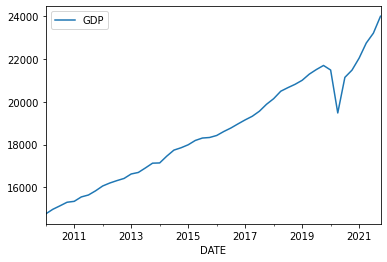

In [17]:
gdp.plot();

### Inflation Data

In [18]:
inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)

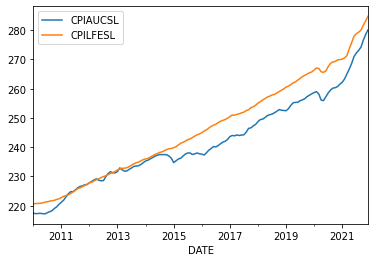

In [19]:
inflation.plot();

### World Bank

Global data on long-term, lower-frequency economic and social development and demographics.

In [20]:
from pandas_datareader import wb
gdp_variables = wb.search('gdp.*capita.*const')
gdp_variables.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
10411,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10413,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10415,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
10416,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


Let's extract per capita GDP.

In [21]:
wb_data = wb.download(indicator='NY.GDP.PCAP.KD', 
                      country=['US', 'CA', 'MX', 'FR', 'GB', 'DK', 'NO'], 
                      start=1990, 
                      end=2019)
wb_data.head()

NY.GDP.PCAP.KD
country year                
Canada  2019    45118.659098
        2018    44917.369814
        2017    44325.416776
        2016    43536.913403
        2015    43596.135537

We have to do some work to plot it.

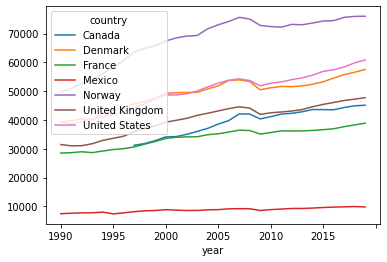

In [22]:
wb_data.unstack().T.reset_index(0).plot();

### OECD

Similar to the World Bank dataset but for OECD countries.

In [23]:
df = web.DataReader('TUD', 'oecd', start='2013', end='2015')
df[['Japan', 'United States']]

Country,Japan,United States
Frequency,Annual,Annual
Measure,Percentage of employees,Percentage of employees
Time,,
2013-01-01,17.799999,10.8
2014-01-01,17.600000,10.7
2015-01-01,17.400000,10.3


### EuroStat

EU-focused economic, social and demographic data.

Look at house price inflation.

In [24]:
df = web.DataReader('prc_hpi_a', 'eurostat')

In [25]:
df.head()

UNIT         Annual average index, 2010=100                               \
PURCHASE    Purchases of existing dwellings                                
GEO                                 Austria Belgium Bulgaria Switzerland   
FREQ                                 Annual  Annual   Annual      Annual   
TIME_PERIOD                                                                
2018-01-01                           158.14  116.79   116.35         NaN   
2019-01-01                           167.20  121.75   121.93         NaN   
2020-01-01                           180.61  126.86   129.22         NaN   

UNIT                                                                         \
PURCHASE                                                                      
GEO         Cyprus Czechia Germany (until 1990 former territory of the FRG)   
FREQ        Annual  Annual                                           Annual   
TIME_PERIOD                                                                   
2018-01-01   92.93   136.3                                            145.6   
2019-01-01   93.87   148.9                                            154.7   
2020-01-01   93.99   161.2                                            167.1   

UNIT                 \
PURCHASE              
GEO         Denmark   
FREQ         Annual   
TIME_PERIOD           
2018-01-01   125.67   
2019-01-01   128.66   
2020-01-01   135.26   

UNIT                                                                                                            \
PURCHASE                                                                                                         
GEO         Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015)   
FREQ                                                                                                    Annual   
TIME_PERIOD                                                                                                      
2018-01-01                                                 NaN                                                   
2019-01-01                                                 NaN                                                   
2020-01-01                                                 NaN                                                   

UNIT                                               ...  \
PURCHASE                                           ...   
GEO         Euro area - 19 countries  (from 2015)  ...   
FREQ                                       Annual  ...   
TIME_PERIOD                                        ...   
2018-01-01                                    NaN  ...   
2019-01-01                                    NaN  ...   
2020-01-01                                    NaN  ...   

UNIT        Annual average rate of change                                 \
PURCHASE                            Total                                  
GEO                           Netherlands Norway Poland Portugal Romania   
FREQ                               Annual Annual Annual   Annual  Annual   
TIME_PERIOD                                                                
2018-01-01                            9.5    1.6    6.6     10.3     5.6   
2019-01-01                            7.3    4.0    8.7      9.6     3.4   
2020-01-01                            7.6    4.8   10.5      8.4     4.7   

UNIT                                                        
PURCHASE                                                    
GEO         Sweden Slovenia Slovakia Turkey United Kingdom  
FREQ        Annual   Annual   Annual Annual         Annual  
TIME_PERIOD                                                 
2018-01-01    -0.9      8.7      7.4    6.9            3.3  
2019-01-01     2.5      6.7      9.1    5.4            1.0  
2020-01-01     4.2      4.6      9.6   24.8            NaN  

[3 rows x 324 columns]